# Data Preprocessing: Time Series Stock Data

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

### Load Times Series Apple Stock Data

In [2]:
apple_raw = pd.read_csv('./data/apple_raw.csv', index_col=0)
apple_raw

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-03,36.029999,35.762501,35.927502,35.924999,79942800.0,33.962158
2017-04-04,36.222500,35.792500,35.812500,36.192501,79565600.0,34.215042
2017-04-05,36.365002,35.952499,36.055000,36.005001,110871600.0,34.037785
2017-04-06,36.130001,35.862499,36.072498,35.915001,84596000.0,33.952713
2017-04-07,36.044998,35.817501,35.932499,35.834999,66688800.0,33.877071
...,...,...,...,...,...,...
2021-04-26,135.059998,133.559998,134.830002,134.720001,66905100.0,134.094650
2021-04-27,135.410004,134.110001,135.009995,134.389999,66015800.0,133.766174
2021-04-28,135.020004,133.080002,134.309998,133.580002,107760100.0,132.959946


### Describe the data

In [3]:
apple_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
High,1027.0,6.605401e+01,3.118845e+01,3.547000e+01,4.348250e+01,5.179000e+01,7.984375e+01,1.450900e+02
Low,1027.0,6.457573e+01,3.021979e+01,3.501500e+01,4.273375e+01,5.087500e+01,7.834000e+01,1.413700e+02
Open,1027.0,6.531713e+01,3.076197e+01,3.530500e+01,4.309625e+01,5.114750e+01,7.905125e+01,1.436000e+02
Close,1027.0,6.534516e+01,3.071534e+01,3.517000e+01,4.307000e+01,5.132000e+01,7.922625e+01,1.431600e+02
Volume,1027.0,1.278808e+08,5.747164e+07,4.544800e+07,8.828600e+07,1.119123e+08,1.504132e+08,4.265100e+08
Adj Close,1027.0,6.405021e+01,3.104893e+01,3.324841e+01,4.148573e+01,5.003397e+01,7.826125e+01,1.422829e+02


## 1. Data Clean
### 1.1 Check whether missing values exist

In [4]:
if sum(apple_raw.isna().mean()) == 0:
    print("There is no null value in the time series stock data")

apple_raw.isna().mean()

There is no null value in the time series stock data


High         0.0
Low          0.0
Open         0.0
Close        0.0
Volume       0.0
Adj Close    0.0
dtype: float64

### 1.2 Check whether outliers exist

z score of the dataset is:
 [0.96952476 0.96137611 0.96708786 ... 2.22047259 2.21726485 2.1524773 ]
There is no outliers in the time series stock data


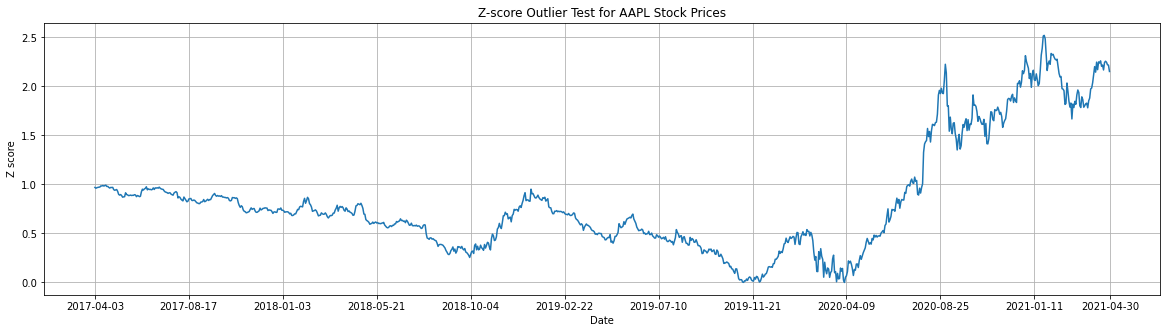

In [9]:
# Using Z-score to find outliers
from scipy import stats
z = np.abs(stats.zscore(apple_raw['Adj Close']))

print('z score of the dataset is:\r\n',z)

totalSeed = apple_raw.index.tolist()
xticks=list(range(0,len(totalSeed), 95))
xlabels=[totalSeed[x] for x in xticks]
xticks.append(len(totalSeed))
xlabels.append(totalSeed[-1])

plt.figure(figsize=(20, 5))
plt.plot(apple_raw.index, z)
ax = plt.gca()
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)
plt.xlabel('Date')
plt.ylabel('Z score')
plt.grid()
plt.title('Z-score Outlier Test for AAPL Stock Prices')
plt.savefig('./pictures/Zscore_raw_data.jpg')

# set a threshold and find the location where the value meets our condition(s)
threshold = 3
outlier_loc = np.where(z > threshold)
if len(outlier_loc) > 1:
    # find the outlier value given its index
    outlier_by_Z_Score = apple_raw['Adj Close'].values[outlier_loc]
    print('the data classified as outlier by z score:\r\n', outlier_by_Z_Score)
    print('the date of the outlier is:\r\n', apple_raw.index[outlier_loc])
else:
    print("There is no outliers in the time series stock data")

## 2. Data Visulization
### 2.1 Overall Trend

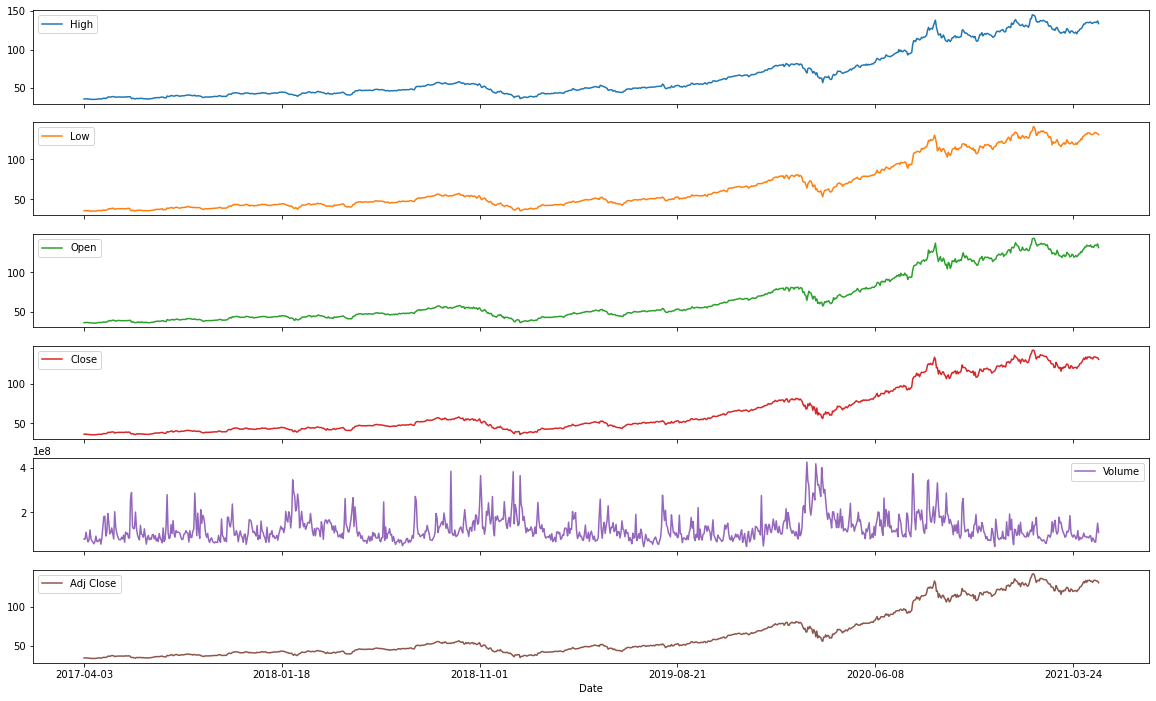

In [7]:
apple_raw.plot(subplots=True, figsize=(20, 12))
plt.savefig('./pictures/data_subplots.jpg')

In [10]:
# Prepare data first
price = apple_raw.drop(columns=['Volume']) # Data without volume
volume = apple_raw['Volume'] # Volume data

### 2.2 Analysis on Price and Volume from 2017.4 to 2021.4

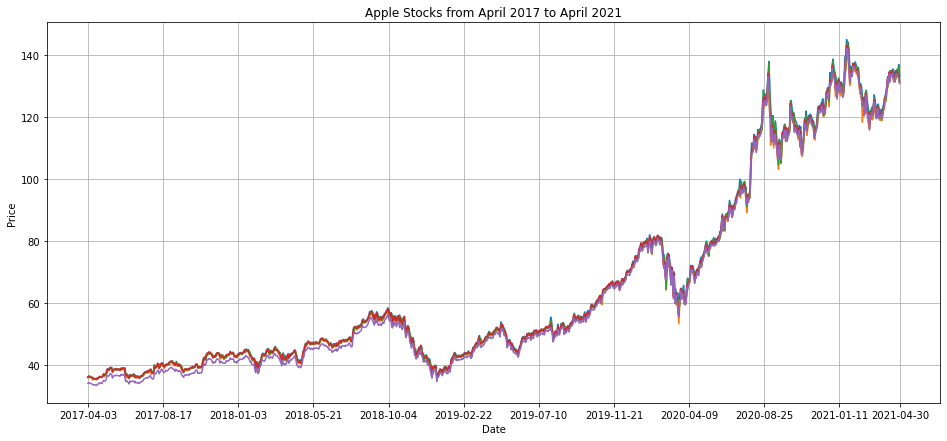

In [9]:
plt.figure(figsize=(16, 7))
plt.plot(price)
ax = plt.gca()
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Stocks from April 2017 to April 2021')
plt.grid()
plt.savefig('./pictures/stock_price.jpg')

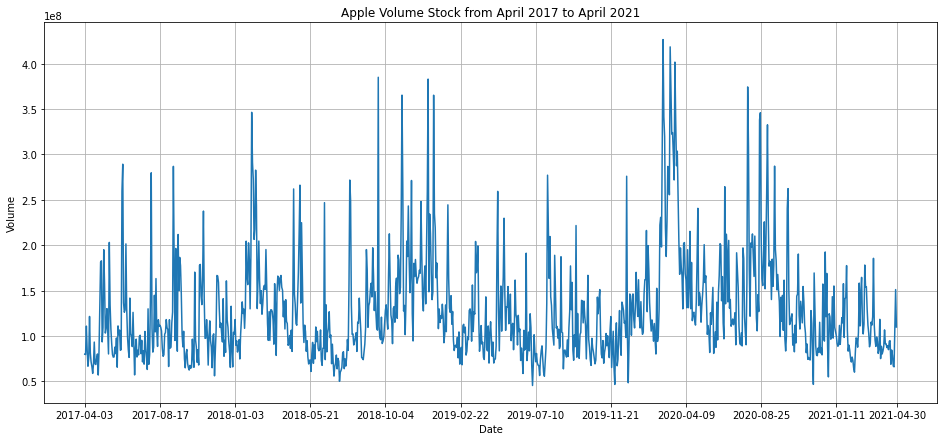

In [10]:
plt.figure(figsize=(16, 7))
plt.plot(volume)
ax = plt.gca()
ax.set_xticks(xticks)
ax.set_xticklabels(xlabels)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Apple Volume Stock from April 2017 to April 2021')
plt.grid()
plt.savefig('./pictures/stock_volume.jpg')

### 2.3 Area Plots on High, Low, Open, Close and Adj Close from 2017.4 to 2021.4

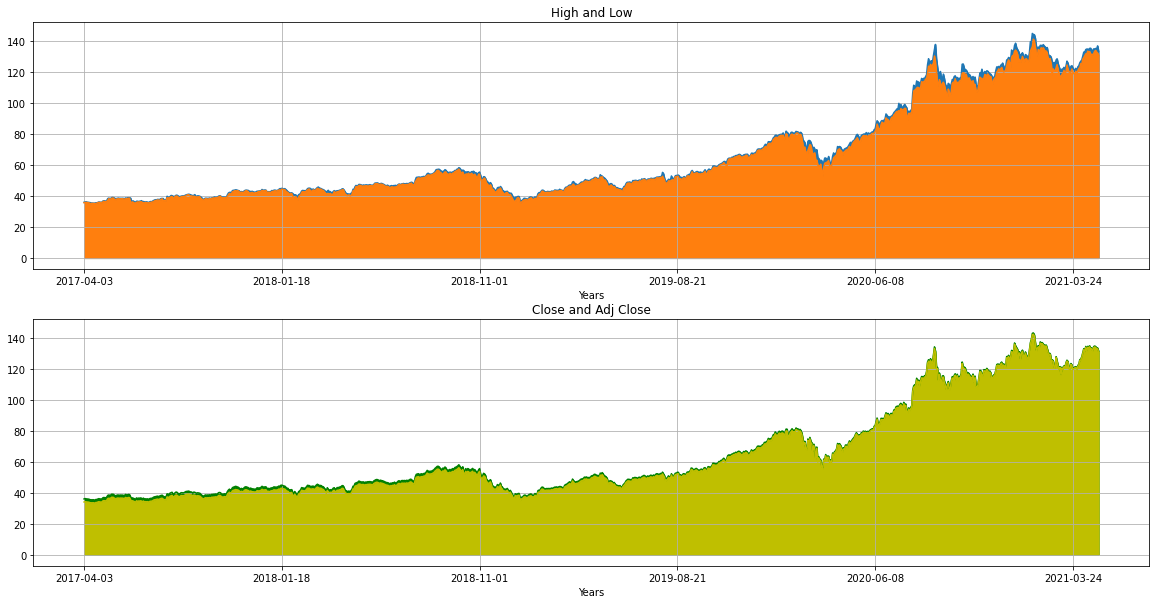

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharey=True, figsize=(20, 10))
ax1.set_title('High and Low')
price['High'].plot(kind='area', ax=ax1)
price['Low'].plot(kind='area', ax=ax1)
ax1.set_xlabel('Years')
ax1.grid()

ax2.set_title('Close and Adj Close')
price['Close'].plot(kind='area', ax=ax2, color='g')
price['Adj Close'].plot(kind='area', ax=ax2, color='y')
ax2.set_xlabel('Years')
ax2.grid()

plt.savefig('./pictures/area_plot.jpg')

### 2.4 Time Series Lag Plot
A lag plot helps to check if a time series data set is random or not. A random data will be evenly spread whereas a shape or trend indicates the data is not random.

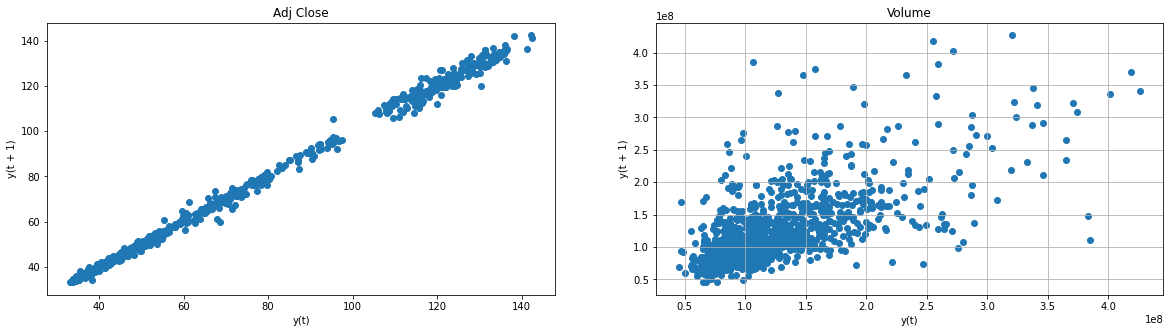

In [16]:
plt.figure(figsize=(20,5))

# # Stock High
# plt.subplot(2, 2, 1)
# pd.plotting.lag_plot(apple_raw['High'])
# plt.title("High")

# # Stock Open
# plt.subplot(2, 2, 2)
# pd.plotting.lag_plot(apple_raw['Open'])
# plt.title("Open")

# Stock Adj Close
plt.subplot(1, 2, 1)
pd.plotting.lag_plot(apple_raw['Adj Close'])
plt.title("Adj Close")

# Stock Volume
plt.subplot(1, 2, 2)
pd.plotting.lag_plot(apple_raw['Volume'])
plt.title("Volume")

# plt.suptitle("Time Series Lag Plot")
plt.grid()
plt.savefig('./pictures/lag_plot.jpg')

## 3. Data Transformation
Do the normailzation of output data, using Min-Max scaling in sklearn to implement it.

In [5]:
# Create a new dataframe with only the 'Adj Close column'
adj_close = apple_raw.filter(['Adj Close'])
# Convert the dataframe to a numpy array
stock = adj_close.values

# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(stock)
print("The scaled data are:\r\n", scaled_data)

The scaled data are:
 [[0.00654609]
 [0.00886542]
 [0.00723972]
 ...
 [0.91449564]
 [0.91358264]
 [0.89514255]]
